In [1]:
'''
Author: Srikanth
Title: Ecommerce_Mobile_WebSite sales
Date:16th June,2020
Objective:To read Data in 'Ecommerce_customers' file. Predict the Sales, Error Metrics using Linear Regression.
Also we can perform Normatization, try Lasso and Ridge to see if any of our results vary
'''

"\nAuthor: Srikanth\nTitle: Ecommerce_Mobile_WebSite sales\nDate:16th June,2020\nObjective:To read Data in 'Ecommerce_customers' file. Predict the Sales, Error Metrics using Linear Regression.\nAlso we can perform Normatization, try Lasso and Ridge to see if any of our results vary\n"

# Description of Data Set

The data set contains Customer's email addess, Address, his average session length at Store, Time spent in App, Time Spent in Website, Length of Membership and his yearly amount spent.  Customers go to Physical Stores, have some sessions and Order the Items either through Mobile app or Website. 

# Approach to Data Set

We will follow the below approach to this Data Set
Step 1: Reading and Cleaning the data
Step 2: Linear Regression Without Normalization
Step 3: Linear Regression with Normalization
Step 4: Linear Regression using Interaction Terms(No Normalization)
Step 5: Linear Regression using Interaction Terms(Normalization)
Step 6: Linear Regression with Ridge(Alpha Value=0.1)
Step 7:Linear Regression with Lasso(Alpha Value=0.1)

In [2]:
# Step 1 : Reading and Cleaning Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users\srika\OneDrive\Documents\Sri\Course\Inceptez_DS\ML\Day4-Assignment_Mobilevs Store\Ecommerce_Customers")

In [5]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


The data does have any null values so we dont need to perform much cleaning

In [7]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

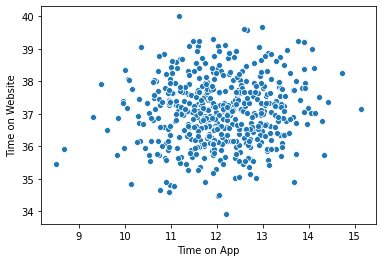

In [8]:
sns.scatterplot(data=df, x='Time on App',y='Time on Website')

Inference :Able to see People spend more Time in Website than in Mobile App

In [9]:
df.corr()

Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000

Don't see any of the independt Variables highly corelated

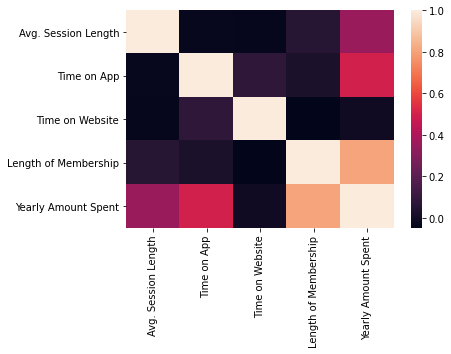

In [10]:
sns.heatmap(df.corr())

# Step 2: Linear Regression Without Normalization 

Lets assign only Numerical Columns to X and drop Email, Address and Avatar and Since 'Yealy Amount Spent' is our Target lets assign to y

In [11]:
X= df.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1)
y=df['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Split our Train and Test Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [14]:
print('Xtrain shape:',X_train.shape)
print('Xtest shape:',X_test.shape)
print('ytrain shape:',y_train.shape)
print('ytest shape:',y_test.shape)

Xtrain shape: (375, 4)
Xtest shape: (125, 4)
ytrain shape: (375,)
ytest shape: (125,)


##### Fitting X & Y Train Data into our Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Learnt Coeff:\n',lr.coef_)
print('Intercept:',lr.intercept_)

Learnt Coeff:
 [26.06944865 38.67556383  0.2518291  61.31057149]
Intercept: -1054.2756810438827


#### Performing Predictions

In [19]:
predictions= lr.predict(X_test)

#### Error Metrics for LR without Normalization

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
print('Mean Absolute Error:',mean_absolute_error(y_test,predictions))
print('Mean Squared Error:',mean_squared_error(y_test,predictions))
print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test,predictions)))
print('r2 Square:',r2_score(y_test,predictions))

Mean Absolute Error: 7.419686968689805
Mean Squared Error: 83.47418226288592
Root Mean Absolute Error: 9.136420648311127
r2 Square: 0.9889411290595321


predictions is a numpy array

#### Creating Dummy test Data to compare the actual and predicted Values

In [63]:
X_test

Avg. Session Length  Time on App  Time on Website  Length of Membership
18             32.187812    14.715388        38.244115              1.516576
361            32.077590    10.347877        39.045156              3.434560
104            31.389585    10.994224        38.074452              3.428860
4              33.330673    12.795189        37.536653              4.446308
156            32.294642    12.443048        37.327848              5.084861
..                   ...          ...              ...                   ...
143            32.115119    11.919242        39.294043              1.443515
271            33.540479    12.884125        36.226042              5.007272
56             32.688229    13.761533        39.252931              2.995761
475            33.811733    11.186809        36.298893              4.301996
272            34.436426    13.325469        36.768603              3.371258

[125 rows x 4 columns]

In [60]:
X_dummy= df.drop(['Email','Address','Avatar'],axis=1)
y_dummy=df['Yearly Amount Spent']

In [61]:
X_train_dum,X_test_dum,y_train_dum,y_test_dum=train_test_split(X_dummy,y_dummy,test_size=0.25,random_state=101)

In [62]:
X_test_dum

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
18             32.187812    14.715388        38.244115              1.516576   
361            32.077590    10.347877        39.045156              3.434560   
104            31.389585    10.994224        38.074452              3.428860   
4              33.330673    12.795189        37.536653              4.446308   
156            32.294642    12.443048        37.327848              5.084861   
..                   ...          ...              ...                   ...   
143            32.115119    11.919242        39.294043              1.443515   
271            33.540479    12.884125        36.226042              5.007272   
56             32.688229    13.761533        39.252931              2.995761   
475            33.811733    11.186809        36.298893              4.301996   
272            34.436426    13.325469        36.768603              3.371258   

     Yearly Amount Spent  
18            452.315675  
361           401.033135  
104           410.069611  
4             599.406092  
156           586.155870  
..                   ...  
143           350.058200  
271           628.047804  
56            520.898794  
475           535.321610  
272           582.491924  

[125 rows x 5 columns]

In [64]:
X_test_dum['Prediction-Yearly Amount Spent']=predictions

C:\Users\srika\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
X_test_dum

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
18             32.187812    14.715388        38.244115              1.516576   
361            32.077590    10.347877        39.045156              3.434560   
104            31.389585    10.994224        38.074452              3.428860   
4              33.330673    12.795189        37.536653              4.446308   
156            32.294642    12.443048        37.327848              5.084861   
..                   ...          ...              ...                   ...   
143            32.115119    11.919242        39.294043              1.443515   
271            33.540479    12.884125        36.226042              5.007272   
56             32.688229    13.761533        39.252931              2.995761   
475            33.811733    11.186809        36.298893              4.301996   
272            34.436426    13.325469        36.768603              3.371258   

     Yearly Amount Spent  Prediction-Yearly Amount Spent  
18            452.315675                      456.581839  
361           401.033135                      402.586906  
104           410.069611                      409.054930  
4             599.406092                      591.556232  
156           586.155870                      590.025702  
..                   ...                             ...  
143           350.058200                      342.329304  
271           628.047804                      634.528378  
56            520.898794                      523.680336  
475           535.321610                      532.732683  
272           582.491924                      574.786150  

[125 rows x 6 columns]

We are able to compare the Actual Amount and Predicted Amount

# Step 3: Linear Regression with Normalization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scx=StandardScaler()

In [26]:
X_train_std= scx.fit_transform(X_train)

In [27]:
X_train_std

array([[ 1.21702711, -0.19482655, -0.7919552 , -1.44538451],
       [ 3.04092114,  0.04354193, -0.11739626,  0.34830113],
       [ 1.80517499,  1.10957299, -0.40895763, -1.64725192],
       ...,
       [-1.18385159,  0.4739653 ,  0.36887018, -0.56535977],
       [ 0.82618043, -0.44408265,  0.01550904,  0.19263957],
       [-0.82928005, -0.65150815,  1.16504694,  1.31670807]])

In [28]:
lr_std=LinearRegression()

In [29]:
lr_std.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print('Learnt Coeff:\n',lr_std.coef_)
print('Intercept:',lr_std.intercept_)

Learnt Coeff:
 [26.60574121 36.91951939  0.24307052 59.73113914]
Intercept: 496.8912119778404


In [31]:
X_test_std=scx.transform(X_test)

#### Performing Predictions

In [32]:
predictions_std= lr_std.predict(X_test_std)

#### Error Metrics for LR with Normalization


In [33]:
print('Mean Absolute Error:',mean_absolute_error(y_test,predictions_std))
print('Mean Squared Error:',mean_squared_error(y_test,predictions_std))
print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test,predictions_std)))
print('r2 Square:',r2_score(y_test,predictions_std))

Mean Absolute Error: 7.419686968689804
Mean Squared Error: 83.47418226288619
Root Mean Absolute Error: 9.136420648311143
r2 Square: 0.9889411290595321


# Step 4: Linear Regression Using Interaction Terms(No Normalization)

Why Interaction Terms?- Since Session Time or Time on App or Time on Website alone does not determine how much amount is spent yearly. Lets try to combine Session time * Time on App, Session Time * Time on Website , Session Time * Time on App * Time on Website

In [34]:
df_interact=df.copy()

In [35]:
df_interact['Session&App']=df_interact['Avg. Session Length']*df_interact['Time on App']
df_interact['Session&Web']=df_interact['Avg. Session Length']*df_interact['Time on Website']
df_interact['SessionApp&Web']=df_interact['Avg. Session Length']*df_interact['Time on Website']*df_interact['Time on App']

In [36]:
df_interact

Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...               Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320     PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...          Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...              Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...       DarkMagenta   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  Session&App  Session&Web  SessionApp&Web  
0             587.951054   436.585386  1365.321410    17279.031466  
1             392.204933   354.683665  1189.858919    13218.690933  
2             487.547505   373.909540  1224.683663    13876.006431  
3             581.852344   470.586942  1259.744042    17280.556117  
4             599.406092   426.472239  1251.121899    16008.340595  
..                   ...          ...          ...             ...  
495           573.847438   450.907401  1210.448596    16421.138856  
496           529.049004   405.871628  1290.596343    15094.474486  
497           551.620145   375.418640  1251.435059    14390.763658  
498           456.469510   412.913206  1227.603795    15211.757895  
499           497.778642   418.712305  1206.054899    14977.764624  

[500 rows x 11 columns]

In [37]:
X_int=df_interact.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis=1)
y_int=df_interact['Yearly Amount Spent']

In [38]:
X_train_int,X_test_int,y_train_int,y_test_int= train_test_split(X_int,y_int,test_size=0.25,random_state=101)

In [39]:
print('Xtrain shape:',X_train_int.shape)
print('Xtest shape:',X_test_int.shape)
print('ytrain shape:',y_train_int.shape)
print('ytest shape:',y_test_int.shape)

Xtrain shape: (375, 7)
Xtest shape: (125, 7)
ytrain shape: (375,)
ytest shape: (125,)


#### Fitting our X & Y Train into LR Model

In [40]:
lr_int=LinearRegression()

In [41]:
lr_int.fit(X_train_int,y_train_int)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print('Learnt Coeff:\n',lr_int.coef_)
print('Intercept:',lr_int.intercept_)

Learnt Coeff:
 [ 2.84576833e+01  3.73564050e+01  4.32919086e+00  6.13072762e+01
  1.80691340e-01 -7.74814370e-02 -3.79686015e-03]
Intercept: -1189.4101616012422


#### Pedictions

In [43]:
predictions_int=lr_int.predict(X_test_int)

#### Error Metrics

In [44]:
print('Mean Absolute Error:',mean_absolute_error(y_test_int,predictions_int))
print('Mean Squared Error:',mean_squared_error(y_test_int,predictions_int))
print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test_int,predictions_int)))
print('r2 Square:',r2_score(y_test_int,predictions_int))

Mean Absolute Error: 7.400914673248972
Mean Squared Error: 83.22227578193579
Root Mean Absolute Error: 9.122624391146212
r2 Square: 0.9889745022677071


# Step 5: Linear Regression Using Interaction Variables(Normalization)

In [45]:
#Standardizing with Interaction terms 
snx_int = StandardScaler()

In [46]:
X_train_int_std=snx_int.fit_transform(X_train_int)
X_test_int_std=snx_int.transform(X_test_int)

In [47]:
lr_int_std=LinearRegression()

In [48]:
lr_int_std.fit(X_train_int_std,y_train_int)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print('Learnt Coeff:\n',lr_int_std.coef_)
print('Intercept:',lr_int_std.intercept_)

Learnt Coeff:
 [29.04310588 35.66025625  4.17862238 59.7279287   5.99354546 -3.89417165
 -5.02422069]
Intercept: 496.8912119778404


#### Predictions 

In [50]:
predictions_int_std=lr_int_std.predict(X_test_int_std)

#### Error Metrics 

In [51]:
print('Mean Absolute Error:',mean_absolute_error(y_test_int,predictions_int_std))
print('Mean Squared Error:',mean_squared_error(y_test_int,predictions_int_std))
print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test_int,predictions_int_std)))
print('r2 Square:',r2_score(y_test_int,predictions_int_std))

Mean Absolute Error: 7.400914673249354
Mean Squared Error: 83.22227578193313
Root Mean Absolute Error: 9.122624391146067
r2 Square: 0.9889745022677074


# Step 6: Linear Regression Using Ridge

In [52]:
from sklearn.linear_model import Ridge

In [53]:
for i in [10,100,1000,10000,100000,1000000]:
    ridge= Ridge(alpha=i)
    ridge.fit(X_train_std,y_train)
    print('Ridge Coeff ' +str(i)+'\n',ridge.coef_)
    predictions_ridge=ridge.predict(X_test_std)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predictions_ridge))
    print('Mean Squared Error:',mean_squared_error(y_test,predictions_ridge))
    print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test,predictions_ridge)))
    print('r2 Square:',r2_score(y_test,predictions_ridge))
    print('-------------------------------------')

Ridge Coeff 10
 [25.90841246 35.94358052  0.28970038 58.22719771]
Mean Absolute Error: 7.716075445769959
Mean Squared Error: 89.96187005903812
Root Mean Absolute Error: 9.4848231432662
r2 Square: 0.9880816237598726
-------------------------------------
Ridge Coeff 100
 [20.96958515 29.04326049  0.53492358 47.46493697]
Mean Absolute Error: 16.047794494611704
Mean Squared Error: 422.60795509290784
Root Mean Absolute Error: 20.55743065397298
r2 Square: 0.9440118284828597
-------------------------------------
Ridge Coeff 1000
 [ 7.23334823  9.96936879  0.46207294 16.64886858]
Mean Absolute Error: 49.3218222428603
Mean Squared Error: 4067.1460342158357
Root Mean Absolute Error: 63.774179996420465
r2 Square: 0.4611741993856405
-------------------------------------
Ridge Coeff 10000
 [0.95903365 1.31873604 0.0773938  2.22123992]
Mean Absolute Error: 65.13738099868118
Mean Squared Error: 7101.309694035588
Root Mean Absolute Error: 84.26926897769785
r2 Square: 0.059200518223590404
-------------

In [54]:
for i in [0.01]:
    ridge= Ridge(alpha=i)
    ridge.fit(X_train_std,y_train)
    print('Ridge Coeff ' +str(i)+'\n',ridge.coef_)
    predictions_ridge=ridge.predict(X_test_std)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predictions_ridge))
    print('Mean Squared Error:',mean_squared_error(y_test,predictions_ridge))
    print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test,predictions_ridge)))
    print('r2 Square:',r2_score(y_test,predictions_ridge))
    print('-------------------------------------')

Ridge Coeff 0.01
 [26.60502499 36.91851681  0.24311996 59.72959651]
Mean Absolute Error: 7.419572630325453
Mean Squared Error: 83.47575795459147
Root Mean Absolute Error: 9.136506879250486
r2 Square: 0.9889409203079069
-------------------------------------


# Step 7: Linear Regression Using Lasso


In [55]:
from sklearn.linear_model import Lasso

In [56]:
for i in[10,100]:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train_std,y_train)
    print('Lasso Coeff ' +str(i)+'\n',lasso.coef_)
    predictions_lasso=lasso.predict(X_test_std)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predictions_lasso))
    print('Mean Squared Error:',mean_squared_error(y_test,predictions_lasso))
    print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test,predictions_lasso)))
    print('r2 Square:',r2_score(y_test,predictions_lasso))
    print('-------------------------------------')
    

Lasso Coeff 10
 [16.30325299 26.47405469  0.         50.33679453]
Mean Absolute Error: 16.991976385382365
Mean Squared Error: 468.79654910349643
Root Mean Absolute Error: 21.65171007342137
r2 Square: 0.9378926466443828
-------------------------------------
Lasso Coeff 100
 [0. 0. 0. 0.]
Mean Absolute Error: 67.5666641867513
Mean Squared Error: 7642.086367003199
Root Mean Absolute Error: 87.41902748831743
r2 Square: -0.012442944124208655
-------------------------------------


In [57]:
for i in[0.001]:
    lasso=Lasso(alpha=i)
    lasso.fit(X_train_std,y_train)
    print('Lasso Coeff ' +str(i)+'\n',lasso.coef_)
    predictions_lasso=lasso.predict(X_test_std)
    print('Mean Absolute Error:',mean_absolute_error(y_test,predictions_lasso))
    print('Mean Squared Error:',mean_squared_error(y_test,predictions_lasso))
    print('Root Mean Absolute Error:',np.sqrt(mean_squared_error(y_test,predictions_lasso)))
    print('r2 Square:',r2_score(y_test,predictions_lasso))
    print('-------------------------------------')

Lasso Coeff 0.001
 [26.60475645 36.91855903  0.24215068 59.73016528]
Mean Absolute Error: 7.419524988477723
Mean Squared Error: 83.4754975756006
Root Mean Absolute Error: 9.136492629866266
r2 Square: 0.9889409548035747
-------------------------------------


#### All Error Metrics at One Place

In [ ]:
#Linear Regression Without Normalization
Mean Absolute Error: 7.419686968689805
Mean Squared Error: 83.47418226288592
Root Mean Absolute Error: 9.136420648311127
r2 Square: 0.9889411290595321
# Linear Regression with Normalization
Mean Absolute Error: 7.419686968689804
Mean Squared Error: 83.47418226288619
Root Mean Absolute Error: 9.136420648311143
r2 Square: 0.9889411290595321
#Linear Regression using Interaction Terms(No Normalization)
Mean Absolute Error: 7.400914673248972
Mean Squared Error: 83.22227578193579
Root Mean Absolute Error: 9.122624391146212
r2 Square: 0.9889745022677071
#Linear Regression using Interaction Terms(Normalization)
Mean Absolute Error: 7.400914673249354
Mean Squared Error: 83.22227578193313
Root Mean Absolute Error: 9.122624391146067
r2 Square: 0.9889745022677074
#Linear Regression with Ridge(Alpha Value=0.01)
Mean Absolute Error: 13.465217571330102
Mean Squared Error: 265.5432834069069
Root Mean Absolute Error: 16.295498869531638
r2 Square: 0.9648201537206227
#Linear Regression with Lasso(Alpha Value=0.001)
Mean Absolute Error: 13.465217571330102
Mean Squared Error: 265.5432834069069
Root Mean Absolute Error: 16.295498869531638
r2 Square: 0.9648201537206227

# Conclusion

In this notebook, we captured error metrics of our model using different ways such as Linear Regression Without Normalization,
Linear Regression with Normalization,Linear Regression using Interaction Terms(No Normalization),Linear Regression using Interaction Terms(Normalization),Linear Regression with Ridge(Alpha Value=0.01) and Linear Regression with Lasso(Alpha Value=0.001). Also we predicted the Yearly Amount Spent using Linear Regression.

When we used with and without Normalization with Interaction terms the r2 square is 0.9889745022677074 and 
with and without Normalization without  Interaction terms the r2 square is 0.9889411290595321
Also using Lasso we are not able to eliminate any variable as the alpha value needed very minute fine tuning  and Ridge also did not make much difference to our prediction